# Simulate Random Game

<div class="alert alert-block alert-info">
<b>Imports:</b> Import all of the classes and useful functions for game initialization
</div>

In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Initialization:</b> Initialize the Game of Risk using the functions from map_setup_functions.py. Our team names are "red" and "blue", and they will randomly split the countries on the RISK map. Each territory will only start with 1 troop. In addition, we call the RandomStrategy subclass to tell each team that they will play using a RandomStrategy!
</div>


In [3]:
full_risk_map = initializeFullRiskMap()
team_names = ["red", "blue"]
team_strategies = [RuleOfThumbStrategy, RandomStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

<div class="alert alert-block alert-warning">
<b>Territories: </b> Let us see what our kind of territories our teams have 
</div>

In [4]:
teams[0].getTerritories()[0:5]

['Central America', 'Ural', 'Middle East', 'Western Europe', 'Congo']

<div class="alert alert-block alert-warning">
<b>Adding Troops: </b> What happens if we add a troop to the first teams first territory? We will see that the RISK Map updates that country with one more troop! 
</div>

In [5]:
#teams[0].addTroops(teams[0].getTerritories()[0], 1)
#print('{territory} now has {x} troops!'.format(territory = teams[0].getTerritories()[0], x = risk_map.getTroops(teams[0].getTerritories()[0])))

<div class="alert alert-block alert-warning">
    <b>Get Next Move: </b> Now, only one territory has more than 1 troop, so that will be the only territory that can make a next move (even in a random strategy!). This calls the strategy asking what move it should make. If getNextMove() returns nothing, that means that the territory is completely surrounded by its own team. Try adding troops to another country.
</div>

In [6]:
#teams[0].getStrategy().addTroopsTurn(3)
#teams[0].getNextMove()

<div class="alert alert-block alert-warning">
<b>Determine and Make Next Move: </b> This will call the strategies getNextMove() function and make that move (including the actual attack!)
</div>

In [7]:
#teams[0].determineAndMakeMove()

<div class="alert alert-block alert-warning">
<b>Play Turn: </b> This plays a complete turn (of potentailly multiple moves) according to a country's Strategy! 
</div>

In [8]:
#teams[0].playTurn()

<div class="alert alert-block alert-warning">
<b>Simulate Game: </b> This simulates a complete game between a Rule of Thumb Strategy and Random Strategy!
</div>

Adding 7 to Middle East!
('Middle East', 'Egypt')
Team red declares attack on Team blue from Middle East to Egypt
Attacking_dice:  [6, 4, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Egypt', 'Southern Europe')
Team red declares attack on Team blue from Egypt to Southern Europe
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0


/Users/janieboettcher/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


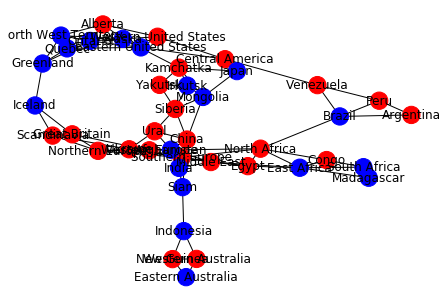

Adding 1 to Siam!
Adding 1 to Siam!
Adding 1 to North West Territory!
Adding 1 to Madagascar!
Adding 1 to North West Territory!
Adding 1 to Eastern Australia!
('North West Territory', ['Alberta'])
('North West Territory', 'Alberta')
Team blue declares attack on Team red from North West Territory to Alberta
Attacking_dice:  [5, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Eastern Australia', ['New Guinea', 'Western Australia'])
('Eastern Australia', 'New Guinea')
Team blue declares attack on Team red from Eastern Australia to New Guinea
Attacking_dice:  [3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Alberta', ['Western United States'])


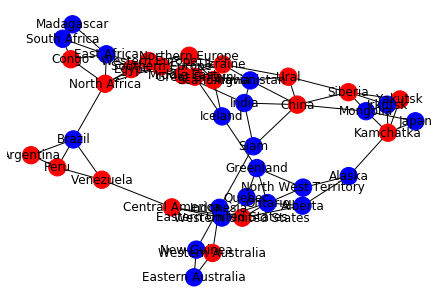

Adding 7 to China!
('China', 'Afghanistan')
Team red declares attack on Team blue from China to Afghanistan
Attacking_dice:  [6, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Afghanistan', 'India')
Team red declares attack on Team blue from Afghanistan to India
Attacking_dice:  [6, 5, 4]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('India', 'Siam')
Team red declares attack on Team blue from India to Siam
Attacking_dice:  [6, 2, 1]
Defending_dice:  [4, 1]
[ True  True]
Attacking Troops Left:  6
Defending Troops Left:  1
Attacking_dice:  [6, 3, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('Siam', 'Indonesia')
Team red declares attack on Team blue from Siam to Indonesia
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('Indonesia', 'New Guinea')
Team red declares attack on Team blue from Indonesia to New Guinea
A

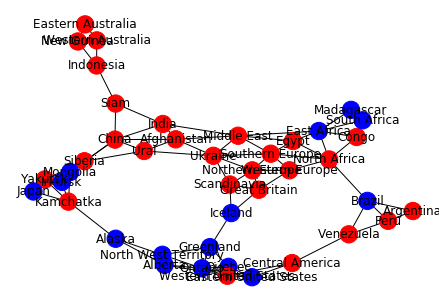

Adding 1 to Ontario!
Adding 1 to Japan!
Adding 1 to North West Territory!
Adding 1 to South Africa!
Adding 1 to Alaska!
('Alaska', ['Kamchatka'])
('Alaska', 'Kamchatka')
Team blue declares attack on Team red from Alaska to Kamchatka
Attacking_dice:  [3]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Ontario', ['Western United States'])
('Ontario', 'Western United States')
Team blue declares attack on Team red from Ontario to Western United States
Attacking_dice:  [2]
Defending_dice:  [3]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('South Africa', ['Congo'])
('South Africa', 'Congo')
Team blue declares attack on Team red from South Africa to Congo
Attacking_dice:  [3]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Japan', ['Kamchatka'])


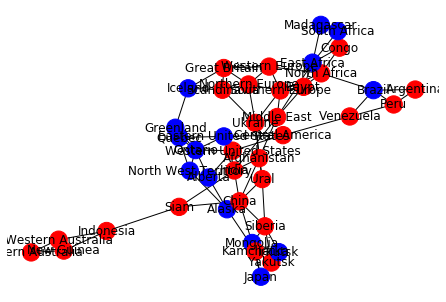

Adding 9 to Kamchatka!
('Kamchatka', 'Mongolia')
Team red declares attack on Team blue from Kamchatka to Mongolia
Attacking_dice:  [3, 2, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [4, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Mongolia', 'Irkutsk')
Team red declares attack on Team blue from Mongolia to Irkutsk
Attacking_dice:  [6, 5, 3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0


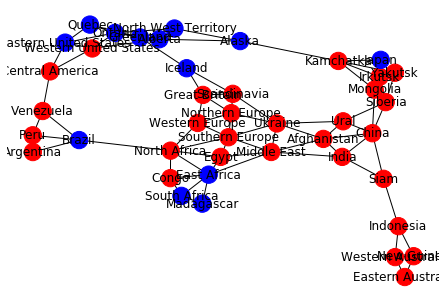

Adding 1 to Ontario!
Adding 1 to East Africa!
Adding 1 to Brazil!
Adding 1 to Quebec!
('Japan', ['Mongolia', 'Kamchatka'])
('Japan', 'Kamchatka')
Team blue declares attack on Team red from Japan to Kamchatka
Attacking_dice:  [1]
Defending_dice:  [2]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('East Africa', ['Egypt', 'North Africa', 'Middle East', 'Congo'])
('East Africa', 'Congo')
Team blue declares attack on Team red from East Africa to Congo
Attacking_dice:  [1]
Defending_dice:  [1]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Ontario', ['Western United States'])
('Ontario', 'Western United States')
Team blue declares attack on Team red from Ontario to Western United States
Attacking_dice:  [6]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Brazil', ['Venezuela', 'Peru', 'Argentina', 'North Africa'])


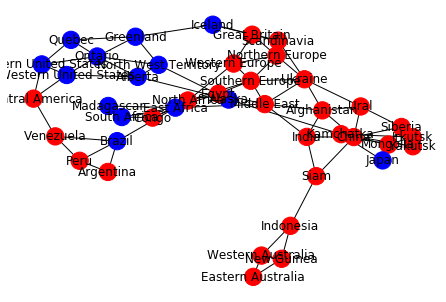

Adding 9 to Central America!
('Central America', 'Western United States')
Team red declares attack on Team blue from Central America to Western United States
Attacking_dice:  [5, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Western United States', 'Eastern United States')
Team red declares attack on Team blue from Western United States to Eastern United States
Attacking_dice:  [6, 5, 4]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Eastern United States', 'Ontario')
Team red declares attack on Team blue from Eastern United States to Ontario
Attacking_dice:  [6, 5, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Ontario', 'Greenland')
Team red declares attack on Team blue from Ontario to Greenland
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Greenland', 'Iceland')
Team red declares attack on Team blue fro

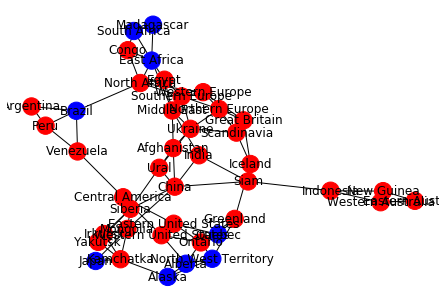

Adding 1 to Alaska!
Adding 1 to Madagascar!
Adding 1 to Alaska!
('North West Territory', ['Ontario', 'Greenland'])
('North West Territory', 'Ontario')
Team blue declares attack on Team red from North West Territory to Ontario
Attacking_dice:  [1]
Defending_dice:  [2]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Alberta', ['Ontario', 'Western United States'])
('Alberta', 'Ontario')
Team blue declares attack on Team red from Alberta to Ontario
Attacking_dice:  [5]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Alaska', ['Kamchatka'])
('Alaska', 'Kamchatka')
Team blue declares attack on Team red from Alaska to Kamchatka
Attacking_dice:  [3, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [5]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Brazil', ['Venezuela', 'Peru', 'Argentina', 'North Africa'])


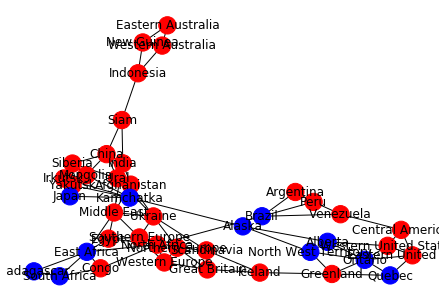

Adding 10 to Irkutsk!
('Irkutsk', 'Kamchatka')
Team red declares attack on Team blue from Irkutsk to Kamchatka
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  17
Defending Troops Left:  0
('Kamchatka', 'Alaska')
Team red declares attack on Team blue from Kamchatka to Alaska
Attacking_dice:  [5, 4, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  15
Defending Troops Left:  1
Attacking_dice:  [6, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  15
Defending Troops Left:  0
('Alaska', 'North West Territory')
Team red declares attack on Team blue from Alaska to North West Territory
Attacking_dice:  [5, 4, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  14
Defending Troops Left:  0
('North West Territory', 'Alberta')
Team red declares attack on Team blue from North West Territory to Alberta
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  12
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_

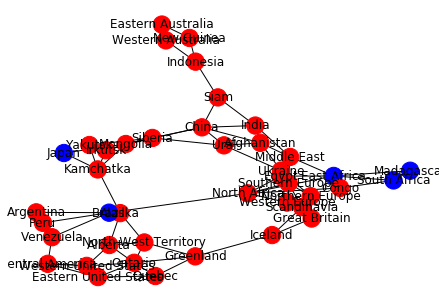

Adding 1 to Japan!
Adding 1 to Brazil!
Adding 1 to East Africa!
('Japan', ['Mongolia', 'Kamchatka'])
('Japan', 'Mongolia')
Team blue declares attack on Team red from Japan to Mongolia
Attacking_dice:  [4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('East Africa', ['Egypt', 'North Africa', 'Middle East', 'Congo'])
('East Africa', 'Middle East')
Team blue declares attack on Team red from East Africa to Middle East
Attacking_dice:  [1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Brazil', ['Venezuela', 'Peru', 'Argentina', 'North Africa'])


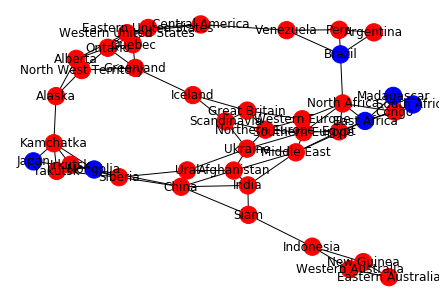

Adding 12 to Congo!
('Congo', 'East Africa')
Team red declares attack on Team blue from Congo to East Africa
Attacking_dice:  [6, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  12
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('East Africa', 'South Africa')
Team red declares attack on Team blue from East Africa to South Africa
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('South Africa', 'Madagascar')
Team red declares attack on Team blue from South Africa to Madagascar
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6, 3]
[False  True]
Attacking Troops Left:  9
Defending Troops Left:  2
Attacking_dice:  [6, 3, 1]
Defending_dice:  [4, 3]
[ True False]
Attacking Troops Left:  8
Defending Troops Left:  1
Attacking_dice:  [5, 4, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0


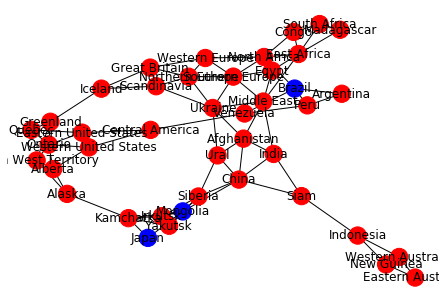

Adding 1 to Brazil!
Adding 1 to Japan!
Adding 1 to Mongolia!
('Japan', ['Kamchatka'])
('Japan', 'Kamchatka')
Team blue declares attack on Team red from Japan to Kamchatka
Attacking_dice:  [5]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Brazil', ['Venezuela', 'Peru', 'Argentina', 'North Africa'])
('Brazil', 'Peru')
Team blue declares attack on Team red from Brazil to Peru
Attacking_dice:  [5, 4, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
('Peru', ['Venezuela', 'Argentina'])


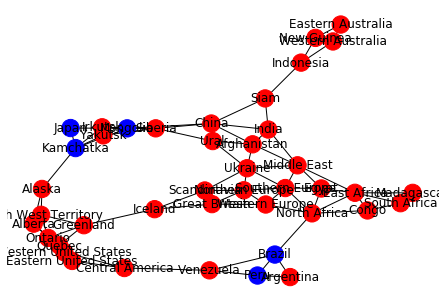

Adding 12 to Argentina!
('Argentina', 'Brazil')
Team red declares attack on Team blue from Argentina to Brazil
Attacking_dice:  [4, 2, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  12
Defending Troops Left:  1
Attacking_dice:  [5, 4, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Brazil', 'Peru')
Team red declares attack on Team blue from Brazil to Peru
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6, 1]
[False  True]
Attacking Troops Left:  10
Defending Troops Left:  2
Attacking_dice:  [6, 5, 3]
Defending_dice:  [6, 2]
[False  True]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [6, 3, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0


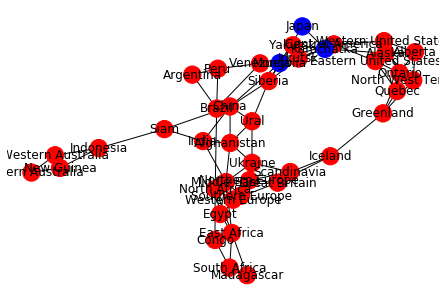

Adding 1 to Mongolia!
Adding 1 to Kamchatka!
Adding 1 to Japan!
('Mongolia', ['Siberia', 'Irkutsk', 'China'])
('Mongolia', 'Irkutsk')
Team blue declares attack on Team red from Mongolia to Irkutsk
Attacking_dice:  [4, 1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [6]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Kamchatka', ['Alaska', 'Yakutsk'])
('Kamchatka', 'Yakutsk')
Team blue declares attack on Team red from Kamchatka to Yakutsk
Attacking_dice:  [6]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


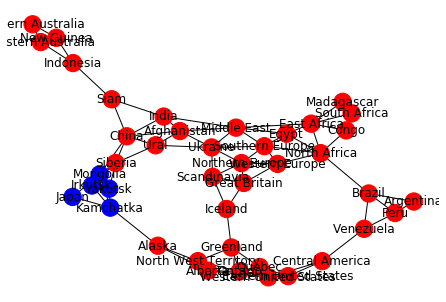

Adding 12 to Siberia!
('Siberia', 'Mongolia')
Team red declares attack on Team blue from Siberia to Mongolia
Attacking_dice:  [6, 5, 3]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0
('Mongolia', 'Kamchatka')
Team red declares attack on Team blue from Mongolia to Kamchatka
Attacking_dice:  [6, 5, 3]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Kamchatka', 'Irkutsk')
Team red declares attack on Team blue from Kamchatka to Irkutsk
Attacking_dice:  [5, 3, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  11
Defending Troops Left:  0
('Irkutsk', 'Yakutsk')
Team red declares attack on Team blue from Irkutsk to Yakutsk
Attacking_dice:  [4, 3, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0


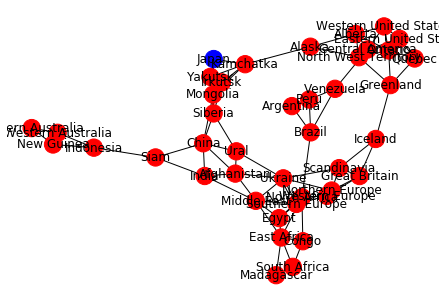

Adding 1 to Japan!
Adding 1 to Japan!
Adding 1 to Japan!
('Japan', ['Mongolia', 'Kamchatka'])
('Japan', 'Mongolia')
Team blue declares attack on Team red from Japan to Mongolia
Attacking_dice:  [6, 4, 2]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('Mongolia', ['Siberia', 'Irkutsk', 'China', 'Kamchatka'])


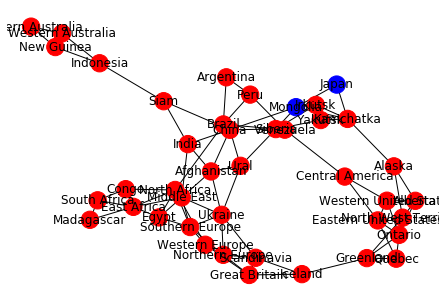

Adding 13 to Kamchatka!
('Kamchatka', 'Japan')
Team red declares attack on Team blue from Kamchatka to Japan
Attacking_dice:  [6, 2, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  14
Defending Troops Left:  0
('Japan', 'Mongolia')
Team red declares attack on Team blue from Japan to Mongolia
Attacking_dice:  [5, 3, 1]
Defending_dice:  [4, 2]
[ True  True]
Attacking Troops Left:  13
Defending Troops Left:  2
Attacking_dice:  [6, 5, 1]
Defending_dice:  [4, 2]
[ True  True]
Attacking Troops Left:  13
Defending Troops Left:  0


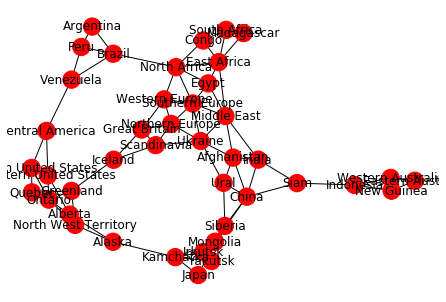

red team has won in 8 turns


In [9]:
curr_team = teams[0]
defending_team = teams[1]
counter = 0
while defending_team.hasTeamWon() == False:
    curr_team.playTurn()
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, with_labels=True)
    plt.show()
    counter += 1
    
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [10]:
import networkx as nx

In [11]:
#